<a href="https://colab.research.google.com/github/SohaSaad2003/ibmEDA/blob/main/Copy_of_EDAEmpIttFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

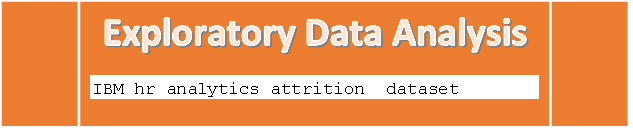

HR Analytics helps human resources to interpret data, find out the trends & help take required steps to keep the organization running smoothly & profitably.
 It has helped human resources to be more active and gain involved role in an organization's planning & objectives.
Retaining employees is one of the major tasks of the Human resource department, employees being the biggest asset of any company.
Thus studying the impact of various factors on employee attrition becomes a major part of HR analytics.

**Brief description of the dataset:**

I use IBM HR Analytics Employee Attrition & Performance data from Kaggle, 
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset
which is created by IBM data scientists. Dataset is in the open source website and can be reached from this link. It has 1470 rows x 35 columns and contains numeric and categorical data types in columns. I loaded the dataset from this link in csv format and read it in the Jupyter notebook after importing necessary libraries.•	describing each employee’s background and characteristics; with whether they are still in the company or whether they have gone to work somewhere else.



In [21]:
import pandas as pd

In [22]:
df = pd.read_csv("empAttrition.csv")
df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5


In [23]:
df.shape # shape the dataset


(1470, 35)

In [24]:
df.describe() # statistics of the numerical data in the data set

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

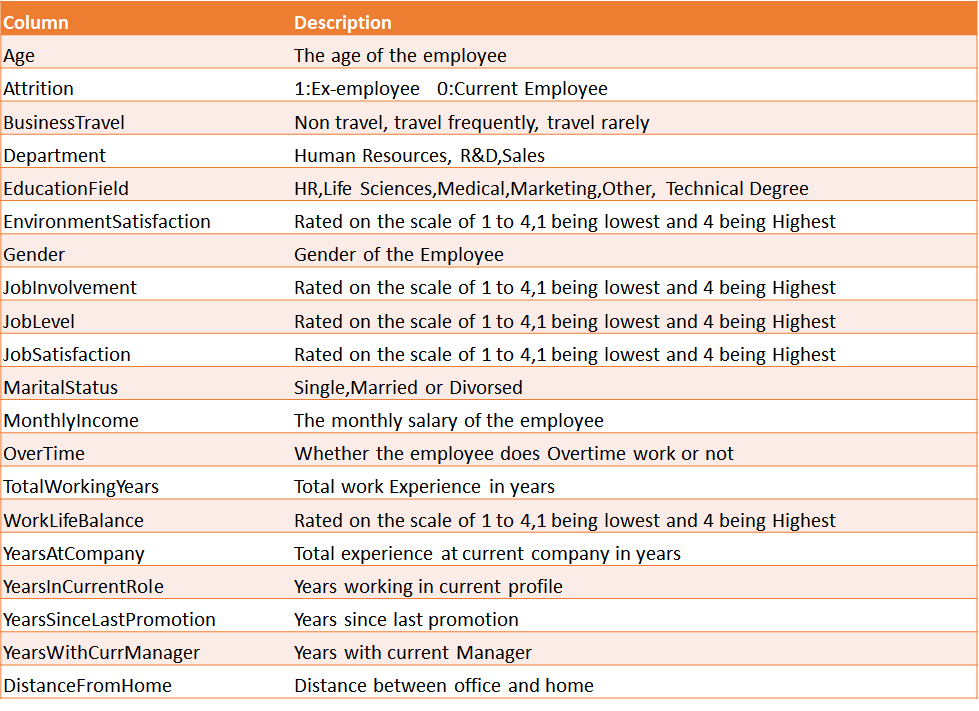

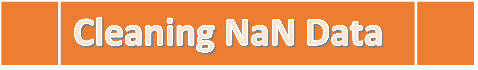

many times in real data some cells might be empty.so we have convert them to NaN

**First for cleaning Data:**

Check for missing data (NULLS).
Review columns to identify what is needed or not.
Review column names and understand what each label means.
Make plots for initial insights.
Actions taken for data cleaning and feature engineering



In [26]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

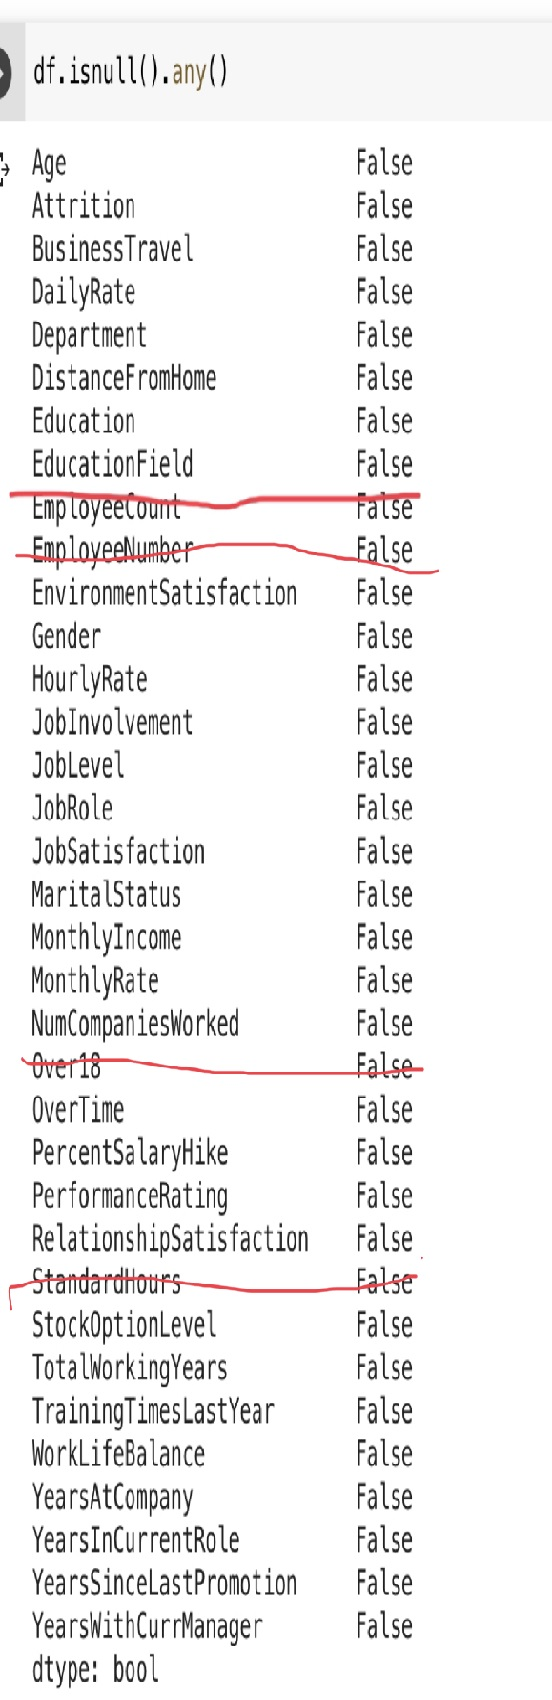

**second Clean column names.**
.
Remove columns: 'EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'
**bold text**

In [27]:
# Remove unnecessary columns in the copy DataFrame

clean_df = df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'])
clean_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


 ***THird replace the Data :**

sometimes we get the data but the data has some garbage or irrelevent form .
some data could be dealt beetter in other form  we replace (Yes = 1, No = 0)inplace = True)

```
# This is formatted as code
```




In [28]:
df.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)


In [29]:
df.head() #I check if Attrition is converted from (yes/No)to (1/0)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [30]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

## Exploratory Data Analysis and Visualization

>- Find pattenrs of data through visualization and reveal hidden data trends via graphs, analysis, and charts
>- Use matplotlib and seaborn library to visualize the data
>- Find relationships between features using bar graphs, histograms, heatmaps, etc.
>- Analyze seperately both categorical and numerical features
>- Create a correlation matrix to inspect the relationships

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
plt.show()

Data Processing

In [32]:
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

import scipy.stats as ss
import sklearn as skl
from scipy import stats

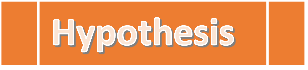


We assumed these many  variables to have the most impact on attrition. as 

- Gender 
- Age
- JobRole
- Monthly Income
-	EducationField
- Distance from Home
- BusinessTravel
- Years since last promotion
- 	Department
- Job satisfaction
- Overtime


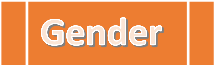

In [35]:
#Number of Unique values
clean_df["Gender"].unique().size

2

There are 2 unique values.Thus, Gender is used as a categorical variable.

col_0   Count
Gender       
Female    588
Male      882


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



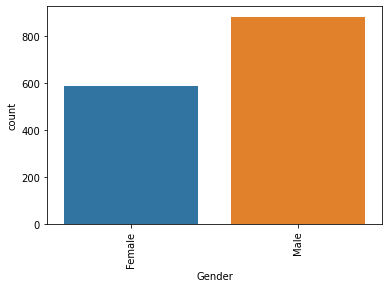

In [37]:
gen = pd.crosstab(clean_df["Gender"], columns='Count')
print(gen)
sns.countplot(clean_df["Gender"])
plt.xticks(rotation=90)
plt.show()

In [38]:
# Percentage of values
print("\nCount:")
print(clean_df["Gender"].value_counts())
print("\nPercentages:")
print(clean_df["Gender"].value_counts()*100/len(clean_df["Gender"]))


Count:
Male      882
Female    588
Name: Gender, dtype: int64

Percentages:
Male      60.0
Female    40.0
Name: Gender, dtype: float64


Attrition         No        Yes
Gender                         
Female     85.204082  14.795918
Male       82.993197  17.006803


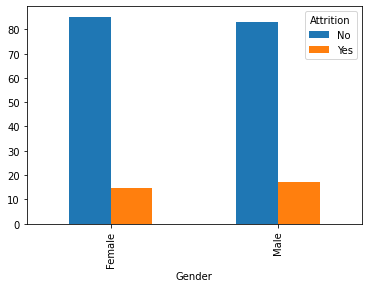

In [39]:
#Bivariate Analaysis with attrition
gender = pd.crosstab(clean_df["Gender"],clean_df["Attrition"],normalize='index')*100
print(gender)
gender.plot(kind='bar')
plt.show()

**Gender can't be taken into account, as the ratio of attrition on male(17%) and female(14%) is more are less same as population attrition ratio(16%)**



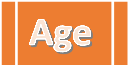

In [40]:
#Number of Unique values
clean_df["Age"].unique().size

43

There are 43 unique vales.Thus, Age is used as a quantitative continous variable.



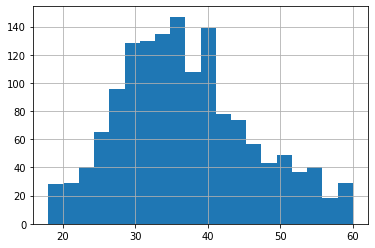

In [42]:
clean_df["Age"].hist(bins=20)


**Age is somewhat normally distributed.**



In [43]:
print(clean_df["Age"].describe())

print("\nMean:",clean_df["Age"].mean())
print("Median:",clean_df["Age"].median())
print("Mode:",clean_df["Age"].mode()[0])

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

Mean: 36.923809523809524
Median: 36.0
Mode: 35


**Since mode,mean,median are somewhat similar,We can confirm that age is normally distributed.**



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



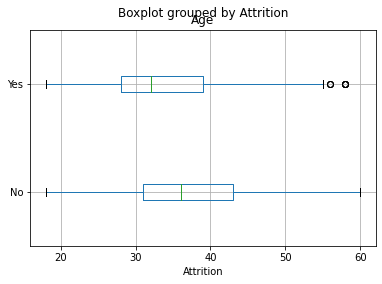

In [44]:
#Bivariate Analysis with Attrition

clean_df.boxplot(column = 'Age', by = 'Attrition', vert= False)
plt.show()


**Since both boxplots are somewhat similar,we can express that Age does not play a powerful role in influencing attrition.**



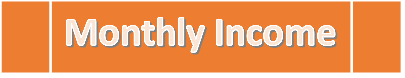

In [45]:
#Number of Unique values
clean_df["MonthlyIncome"].unique().size

1349

**There are 1349 unique vales.Thus, Monthly Income is used as a quantitative continous variable.**



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd537d87d90>]],
      dtype=object)

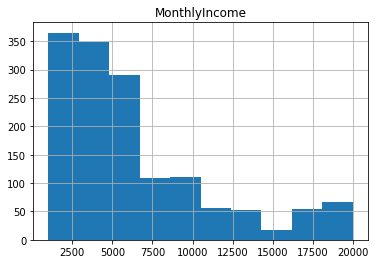

In [46]:
clean_df.hist(column = 'MonthlyIncome')


**This variable is left skewed distribution,meaning most of its values are located at the lower end(2000-6000)**.



In [48]:
print(clean_df["MonthlyIncome"].describe())


count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



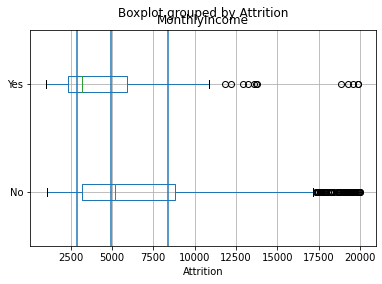

In [49]:
clean_df.boxplot(column = 'MonthlyIncome', by = 'Attrition', vert= False)
plt.axvline(x=np.median(clean_df["MonthlyIncome"]))
plt.axvline(x=np.percentile(clean_df["MonthlyIncome"],25))
plt.axvline(x=np.percentile(clean_df["MonthlyIncome"],75))
plt.show()

**It has affected the attrition, around 75% of employee who left the job gets less salary the mean salary 6500.There is attrition towards the lower end of monthly income.**





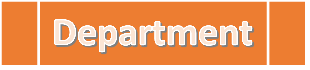

In [50]:
#Number of Unique values
clean_df["Department"].unique().size

3

**There are 3 unique vales.Thus, Department is used as a categorical variable.**

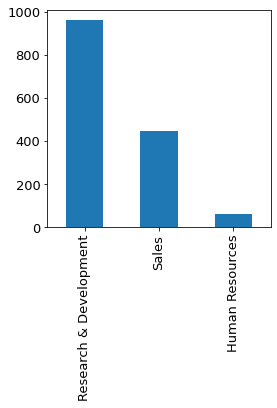

In [51]:
clean_df["Department"].value_counts().plot(kind="bar",figsize=(4,4),fontsize=13)
plt.show()

In [52]:
# Percentage of values
print("\nCount:")
print(clean_df["Department"].value_counts())
print("\nPercentages:")
print(clean_df["Department"].value_counts()*100/len(clean_df["BusinessTravel"]))



Count:
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Percentages:
Research & Development    65.374150
Sales                     30.340136
Human Resources            4.285714
Name: Department, dtype: float64


In [53]:
#Attrition percentage for whole data
att = pd.crosstab(clean_df['Attrition'],columns='Count')
att/len(clean_df)*100


col_0,Count
Attrition,
No,83.877551
Yes,16.122449


Attrition                      No        Yes
Department                                  
Human Resources         80.952381  19.047619
Research & Development  86.160250  13.839750
Sales                   79.372197  20.627803


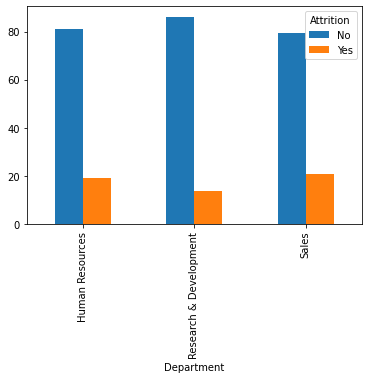

In [54]:
#Bivariate Analysis with Attrition

#Percentage of attrition across categories
tab=pd.crosstab(clean_df["Department"],clean_df["Attrition"],normalize='index')*100
print(tab)
tab.plot(kind="bar")
plt.show()

**The attrition rates for the 3 departments are somewhat near to the total ttrition rate of 16%.Hence, department does not influence attrition**



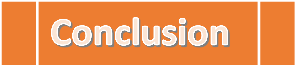

The top 8 variables which impacted attrition were- 
•	YearAtCompany
•	Monthly Income
•	Job level
•	Total Working Years 
•	Department
•	Monthly Income
•	Job level
•	Total Working Years 

**The workers with low JobLevel, MonthlyIncome, YearAtCompany, and TotalWorkingYears** are more likely to quit there jobs.
BusinessTravel : The workers who travel alot are more likely to quit then other employees.

**Department :**  The worker in Research & Development are more likely to stay then the workers on other departement.

**EducationField :**  The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

**Gender : ** The Male are more likely to quit.

**JobRole :** The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

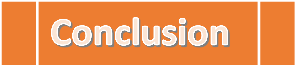

The top 8 variables which impacted attrition were- 
•	YearAtCompany
•	Monthly Income
•	Job level
•	Total Working Years 
•	Department
•	EducationField
•	Gender
•	JobRole

**The workers with low JobLevel, MonthlyIncome, YearAtCompany**, and TotalWorkingYears are more likely to quit there jobs.
BusinessTravel : The workers who travel alot are more likely to quit then other employees.

**Department : **The worker in Research & Development are more likely to stay then the workers on other departement.

**EducationField :** The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

**Gender :** The Male are more likely to quit.

**JobRole :** The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

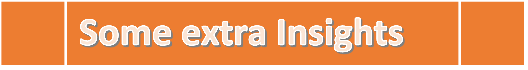


•	Job level and Monthly income are positively corelated

•	Department and educational background are highly associated

•	People who travelled frequently had higher attrition

•	People from some specific educational backgrounds have high attrition

•	When people switch to a new manager or to a new role 25% of them quit within a year

•	Singles have higher rate of attrition(25%)

•	People with low satisfaction of the work environment had higher attrition rates.

•	Gender has no effect on attrition

